In [1]:
#!pip install imblearn --user  
#uncomment below only if imblearn is not installed 

#restart Jupyter engine again is still fails to import imblearn

In [2]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from imblearn.over_sampling import SMOTE 

from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
#function to get confusion metric parameters printed

def printingConfusionMetricDetails(confusion_metric):
    TP = confusion_metric[1,1] # true positive 
    TN = confusion_metric[0,0] # true negatives
    FP = confusion_metric[0,1] # false positives
    FN = confusion_metric[1,0] # false negatives


    print('Acuracy Score', accuracy_score(y_test,y_pred_default))
    print('Sensitivity: ', TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))
    print('false postive rate: ',FP/ float(TN+FP))
    print('positive predictive value: ', TP / float(TP+FP))
    print('Negative predictive value: ',TN / float(TN+ FN))
    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


In [7]:
#function to pring 
def printingMSEandRsquare(y_test, y_pred):
    mean_square_err = mean_squared_error(y_test, y_pred)
    r_square = r2_score(y_test, y_pred)
    print(mean_square_err)
    print(r_square)

In [8]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [9]:
#drop mobile number  - the number is not needed for any calculation or analysis
data.drop('mobile_number',axis=1,inplace=True)

In [10]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [11]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
188,arpu_3g_6,74.846748
176,av_rech_amt_data_6,74.846748
216,fb_user_6,74.846748
196,night_pck_user_6,74.846748
160,total_rech_data_6,74.846748
...,...,...
145,max_rech_amt_7,0.000000
144,max_rech_amt_6,0.000000
143,total_rech_amt_9,0.000000
142,total_rech_amt_8,0.000000


In [12]:
#Dropping columns where null are more than 95%
data.loc[:, data.isnull().mean() < .95]
# 1 column dropped

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [13]:
#DATA IMPUTATION
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [14]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [15]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
0,circle_id,0.0
113,std_ic_t2o_mou_7,0.0
143,total_rech_amt_9,0.0
144,max_rech_amt_6,0.0
145,max_rech_amt_7,0.0
...,...,...
79,og_others_9,0.0
80,total_og_mou_6,0.0
81,total_og_mou_7,0.0
82,total_og_mou_8,0.0


In [16]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [17]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [18]:
#data.describe()
data.shape

(99999, 225)

In [19]:
#Deriving Features - 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 228)

In [20]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 222 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [21]:
data_filtered.shape
#before outlier

(30019, 222)

In [22]:
# HANDLING OUTLIERS
#z_scores = stats.zscore(data_filtered)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data_filtered = data_filtered[filtered_entries]

#Using Quantile method ##method is removing all churn_flag=1 rows
Q1 = data_filtered.quantile(0.1)
Q3 = data_filtered.quantile(0.9)
IQR = Q3 - Q1

#data_filtered = data_filtered[~((data_filtered < (Q1 - 1.5 * IQR)) |(data_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]
#data_filtered.info(verbose=True)

In [23]:
data_filtered.shape
#after outlier treatment

(30019, 222)

In [24]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    26973
1     3046
Name: churn_flag, dtype: int64


In [25]:
#CONSOLIDATION OF OTHER VALUES IS NEEDED 

In [26]:
#now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 168 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
l

In [27]:
#Plotting heatmap to get an overall picture
#plt.figure(figsize = (50, 30))
#sns.heatmap(data_filtered.corr(), annot = True, cmap="YlGnBu")
#plt.show()

In [28]:
## Heatmap is not of much help with large no of features
#Analysing further all numeric (float and int) variables in the dataset
#Its one and the same now ..selection is not needed .. all numeric DF
#data_numeric = data_filtered.select_dtypes(include=['float64', 'int64','int32'])

data_numeric=data_filtered
data_numeric.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
0,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,57.74,19.38,18.74,1580.0,790.0,1185.0,3,6,5,1
1,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,21.03,910.65,122.16,437.0,603.0,520.0,5,0,1,0
2,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,0.00,507.0,253.0,380.0,10,9,1,0
3,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0.00,2.45,21.89,570.0,348.0,459.0,0,0,17,0
4,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,0.00,816.0,0.0,408.0,0,1,6,0


In [29]:
correlation = data_numeric.corr()
correlation

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,NaN,1.000000,0.631603,0.571027,0.291466,0.142720,0.116785,...,0.122699,0.123493,0.172676,0.941311,0.608024,0.869008,-0.040223,0.000132,0.018859,0.058438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_amt_data_6_7,NaN,NaN,NaN,NaN,0.869008,0.890972,0.737276,0.229281,0.227797,0.189846,...,0.140380,0.152801,0.144810,0.882371,0.892326,1.000000,-0.008149,-0.008738,-0.003386,0.009734
days_since_recharge_6,NaN,NaN,NaN,NaN,-0.040223,0.007753,0.014882,-0.021534,0.009368,0.007667,...,-0.012873,-0.010855,-0.013781,-0.059689,0.043088,-0.008149,1.000000,-0.002028,0.056297,0.035712
days_since_recharge_7,NaN,NaN,NaN,NaN,0.000132,-0.026051,-0.027658,0.013301,-0.019921,-0.013377,...,-0.015347,-0.014986,-0.008861,0.053100,-0.066131,-0.008738,-0.002028,1.000000,0.147690,0.062829
days_since_recharge_8,NaN,NaN,NaN,NaN,0.018859,-0.061927,-0.086346,-0.009344,-0.033838,-0.053130,...,-0.033237,-0.019842,-0.016792,0.030428,-0.035076,-0.003386,0.056297,0.147690,1.000000,0.132574


In [30]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
days_since_recharge_8    0.132574
std_og_mou_6             0.128642
std_og_t2m_mou_6         0.097622
roam_og_mou_7            0.092735
std_og_t2t_mou_6         0.092617
Name: churn_flag, dtype: float64 



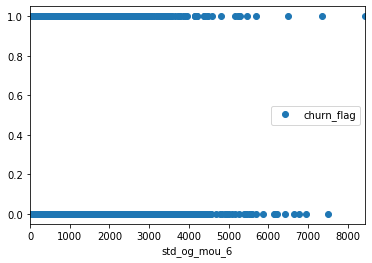

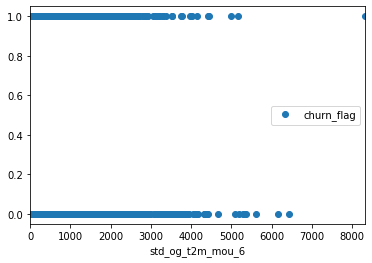

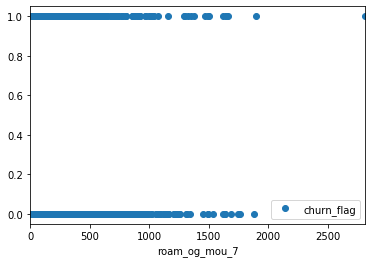

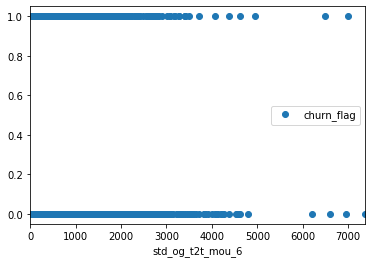

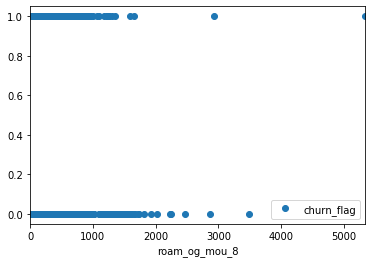

In [31]:
data_numeric.plot(y='churn_flag', x='std_og_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2m_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_7',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2t_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_8',style ='o')


In [32]:
#Analysing categorical variables
#data_nonnum= data_filtered.select_dtypes(exclude=['float64', 'int64'])
#data_nonnum.describe()

In [33]:
data_filtered.shape

(30019, 168)

In [34]:
#SPLITTING DATA SET
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print ("Shape of Train dataset",X_train.shape, y_train.shape)
print ("Shape of Test dataset",X_test.shape, y_test.shape)


Shape of Train dataset (21013, 167) (21013,)
Shape of Test dataset (9006, 167) (9006,)


In [35]:
#TREATING CLASS IMBALANCE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm =  SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 2120
Before OverSampling, counts of label '0': 18893 

After OverSampling, the shape of train_X: (37786, 167)
After OverSampling, the shape of train_y: (37786,) 

After OverSampling, counts of label '1': 18893
After OverSampling, counts of label '0': 18893


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

train_after_scaling = scaler.transform(X_train)
test_after_scaling = scaler.transform(X_test)

In [37]:
logreg = LogisticRegression()

logreg.fit(train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')


In [38]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [39]:
y_pred = logreg.predict(test_after_scaling)

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y_pred.size

9006

In [42]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [43]:
printingMSEandRsquare(y_test, y_pred)

0.12935820564068398
-0.4022825203686671


In [44]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[7204  876]
 [ 289  637]]


In [45]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)

Acuracy Score 0.870641794359316
Sensitivity:  0.6879049676025918
Specificity:  0.8915841584158416
false postive rate:  0.10841584158415841
positive predictive value:  0.42101784534038333
Negative predictive value:  0.9614306686240491
Misclassification Rate:  0.12935820564068398


In [46]:
x = train_after_scaling

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(random_state=42)

In [49]:
pca.fit(x)

PCA(random_state=42)

In [50]:
pca.components_

array([[-1.49816308e-19, -5.55111512e-17, -1.11022302e-16, ...,
        -3.47851088e-03, -1.11516669e-02, -1.63655948e-02],
       [ 6.93849073e-20,  0.00000000e+00,  6.93889390e-17, ...,
         2.01655792e-04, -1.20361157e-02, -1.93007705e-02],
       [-6.84070471e-20, -1.38777878e-17,  3.46944695e-17, ...,
        -1.63245744e-03, -2.83504289e-03, -6.73506498e-03],
       ...,
       [ 0.00000000e+00,  9.29195353e-02,  8.87336813e-02, ...,
         1.21430643e-17, -2.77555756e-17, -1.04083409e-17],
       [ 9.99999908e-01, -2.20062066e-04, -1.14174695e-04, ...,
        -4.57397792e-20,  1.10114283e-19,  2.60886148e-19],
       [-0.00000000e+00,  1.34374832e-02,  3.77464608e-01, ...,
         6.24500451e-17, -6.93889390e-17,  5.55111512e-17]])

In [51]:
pca.explained_variance_ratio_

array([1.23805689e-01, 8.28309946e-02, 6.43722727e-02, 5.19323950e-02,
       3.51178938e-02, 3.41479218e-02, 3.10013762e-02, 2.77145098e-02,
       2.47892692e-02, 2.19792618e-02, 2.13901877e-02, 1.96766240e-02,
       1.74254303e-02, 1.68823100e-02, 1.67088246e-02, 1.64186420e-02,
       1.56854432e-02, 1.48662629e-02, 1.44885301e-02, 1.27572469e-02,
       1.23729787e-02, 1.12351493e-02, 1.03595536e-02, 9.80913156e-03,
       9.63881035e-03, 9.38372774e-03, 9.14558458e-03, 8.55730026e-03,
       8.51098674e-03, 8.13831115e-03, 7.94054486e-03, 7.78429602e-03,
       7.53750804e-03, 7.15193456e-03, 6.99054595e-03, 6.68866392e-03,
       6.38627412e-03, 6.27732352e-03, 5.95861604e-03, 5.87972726e-03,
       5.70550272e-03, 5.65733856e-03, 5.53266750e-03, 5.35339762e-03,
       5.31386739e-03, 5.13250709e-03, 5.09603441e-03, 5.03002022e-03,
       4.68755620e-03, 4.50526049e-03, 4.32158416e-03, 4.31124656e-03,
       3.97525590e-03, 3.88713458e-03, 3.66663739e-03, 3.54856635e-03,
      

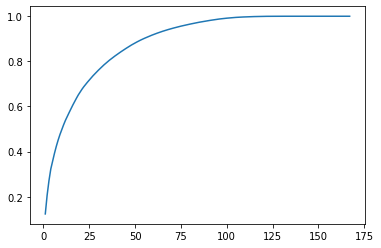

In [52]:
#75 percent of component explain close to 90 percent of variace
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [53]:
#pc2 = PCA(n_components=75, random_state=42)
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=75)
train_pca = pcaFinal.fit_transform(train_after_scaling)
train_pca.shape

(37786, 75)

In [54]:
#Applying selected components to the test data - 75 components
test_pca = pcaFinal.fit_transform(test_after_scaling)
test_pca.shape 


(9006, 75)

In [55]:
train_pca

array([[-2.08878718,  0.6472724 , -0.4959    , ..., -0.03040028,
        -0.06280249, -0.10341206],
       [ 3.98858833, -3.64346859, -1.07423986, ...,  0.47044809,
         0.17411462,  0.13148594],
       [-0.32898829, -1.10943721, -4.24711436, ..., -0.46116047,
         0.24396888, -0.41849644],
       ...,
       [-1.81101951, -2.49606684, -0.03710178, ...,  0.33163409,
         0.1235386 ,  0.03971404],
       [-2.42874193, -0.54056112,  3.46123869, ...,  0.27016659,
         0.21756549,  0.16984263],
       [-2.72642889, -1.67085284,  0.76951087, ...,  0.2788169 ,
        -0.0561761 , -0.47554941]])

In [56]:
y_train.shape

(37786,)

In [57]:
logreg = LogisticRegression()

logreg.fit(train_pca, y_train)

LogisticRegression()

In [58]:
y_pred = logreg.predict(test_pca)


In [59]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [60]:
y_pred.size

9006

In [61]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [62]:
printingMSEandRsquare(y_test, y_pred)

0.48401065956029315
-4.246823610546798


In [63]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)
y_pred_default = y_pred

[[4033 4047]
 [ 312  614]]


In [64]:
printingConfusionMetricDetails(confusion_matrix2)

Acuracy Score 0.5159893404397069
Sensitivity:  0.6630669546436285
Specificity:  0.49913366336633663
false postive rate:  0.5008663366336633
positive predictive value:  0.1317313881141386
Negative predictive value:  0.9281933256616801
Misclassification Rate:  0.48401065956029315


In [65]:
# Decision tree after Logistic regression

# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [66]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74      8080
           1       0.17      0.68      0.27       926

    accuracy                           0.62      9006
   macro avg       0.56      0.65      0.51      9006
weighted avg       0.86      0.62      0.70      9006

[[4965 3115]
 [ 298  628]]
Acuracy Score 0.62103042416167


In [67]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
printingConfusionMetricDetails(confusion_tree)

Acuracy Score 0.62103042416167
Sensitivity:  0.6781857451403888
Specificity:  0.614480198019802
false postive rate:  0.38551980198019803
positive predictive value:  0.1677798557306973
Negative predictive value:  0.9433783013490404
Misclassification Rate:  0.37896957583833


In [68]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}


In [69]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [70]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)


In [71]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [72]:
y_train.shape

(37786,)

In [73]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.446733,0.141442,0.003198,0.000969,1,{'max_depth': 1},0.675972,0.677385,0.676327,0.673151,...,0.672762,0.006057,39,0.672654,0.671871,0.672566,0.672897,0.676370,0.673272,0.001586
1,0.786050,0.114908,0.004389,0.001017,2,{'max_depth': 2},0.680206,0.701204,0.683208,0.702263,...,0.692744,0.009242,38,0.692901,0.696947,0.693209,0.696947,0.696649,0.695330,0.001864
2,0.988366,0.148835,0.002407,0.000483,3,{'max_depth': 3},0.739614,0.745931,0.748710,0.747651,...,0.745329,0.003168,37,0.754929,0.748123,0.750041,0.748652,0.749909,0.750331,0.002413
3,1.251149,0.219104,0.003000,0.000620,4,{'max_depth': 4},0.769383,0.768162,0.775308,0.769485,...,0.771079,0.002673,36,0.777590,0.767475,0.777730,0.772569,0.775877,0.774248,0.003864
4,1.449774,0.208250,0.003604,0.000813,5,{'max_depth': 5},0.779307,0.787482,0.797274,0.792775,...,0.790928,0.006898,35,0.802038,0.797744,0.801747,0.800225,0.802441,0.800839,0.001720


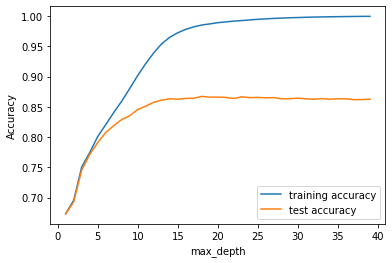

In [74]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [75]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [76]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.871242,0.208864,0.003990,7.979012e-07,5,{'min_samples_leaf': 5},0.844006,0.863306,0.855895,0.863570,...,0.857170,0.007171,1,0.959177,0.959972,0.959708,0.958980,0.958285,0.959224,0.000589
1,3.263272,0.305804,0.003790,3.989244e-04,25,{'min_samples_leaf': 25},0.827732,0.844383,0.840413,0.840545,...,0.839597,0.006221,2,0.886860,0.886764,0.885276,0.889609,0.884349,0.886572,0.001787
2,2.994324,0.129664,0.003802,4.058107e-04,45,{'min_samples_leaf': 45},0.826012,0.832341,0.830091,0.831150,...,0.831049,0.003135,3,0.866250,0.863012,0.862251,0.863376,0.864137,0.863805,0.001365
3,2.926104,0.199408,0.003996,6.191942e-04,65,{'min_samples_leaf': 65},0.813310,0.823872,0.824137,0.824666,...,0.822580,0.004757,4,0.851661,0.846737,0.851070,0.850905,0.848953,0.849865,0.001810
4,2.858622,0.421719,0.003597,4.930657e-04,85,{'min_samples_leaf': 85},0.810267,0.818182,0.823607,0.828106,...,0.821310,0.006465,5,0.843026,0.838566,0.842866,0.841675,0.844752,0.842177,0.002055


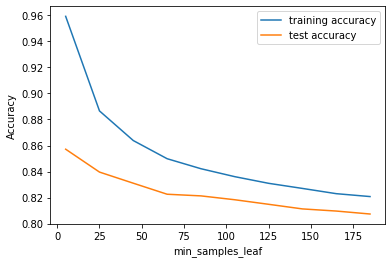

In [77]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 150

In [ ]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(train_pca,y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

In [ ]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

In [ ]:
printingConfusionMetricDetails(confusion_tree_hyper)

In [ ]:
# Random forest

# Importing random forest classifier from sklearn library
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [ ]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

In [ ]:
printingConfusionMetricDetails(confusion_tree_hyper)

In [ ]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [ ]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 6 to 10

In [ ]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [ ]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy got is',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=300)

In [ ]:
rfc.fit(train_pca,y_train)

In [ ]:
# predict
y_pred_default = rfc.predict(test_pca)

In [ ]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

In [ ]:
printingConfusionMetricDetails(confusion_tree_hyper)

In [ ]:
# Random forest accuracty - 0.86, sensitivity - 0.23, Specificty - 0.94
# Logistic - 0.88, sensitivity - 0.099, specificity - 0.97
# Decision tree - 0.80, Sensitivity - 0.32, Specificity - .78
# 

In [ ]:
# we  have not done imbalance management - which is important - not sure what is that
#Addressed 


# we need to do outlier management?
#Addressed.. have a look.. at the start search for HANDLING OUTLIERS

In [ ]:
# next to do compare the accuracies of the models -gaurav

In [ ]:
#then do all features whichever model has highest accuracy - Gaurav
# then select which features may need to be looked into?
